# Liste indicateurs

In [3]:
import pandas as pd
pd.set_option('display.max_columns', 500)

In [22]:
df = pd.read_excel("C:\\Users\\user\\Desktop\\CNAM\\Extraction_IJ\\Extraction_IJ_hebdo_UNIV_LYON_Compte U.xlsx", sheet_name='Extraction hebdomadaire 1')
df2 = pd.read_excel("C:\\Users\\user\\Desktop\\CNAM\\Extraction_IJ\\Extraction_IJ_hebdo_UNIV_LYON_Compte U.xlsx", sheet_name='Extraction hebdomadaire 2')

In [42]:
result_df = pd.concat([df, df2], axis=0)

In [43]:
result_df.head()

,Application de traitement,Périodicité,Caisse,Période début,Période fin,Risque,Injecteur de la déclaration de salaire,Destinataire du règlement,COVID,Nombre 1ère IJ,Délai après réception de la déclaration de salaire,Nombre DSN,Nombre DSIJ,Nombre papier,Code semaine
0,PROGRES TS,Hebdomadaire,11,2021-01-04,2021-01-10,MALADIE,Non déterminé,N : HORS SUBRO,NON,682,35.441349,ND,ND,ND,202101
1,PROGRES TS,Hebdomadaire,11,2021-01-04,2021-01-10,MALADIE,Non déterminé,N : HORS SUBRO,OUI,102,38.303922,ND,ND,ND,202101
2,PROGRES TS,Hebdomadaire,11,2021-01-04,2021-01-10,MALADIE,Non déterminé,O : SUBRO,NON,442,37.821267,ND,ND,ND,202101
3,PROGRES TS,Hebdomadaire,11,2021-01-04,2021-01-10,MALADIE,Non déterminé,O : SUBRO,OUI,78,44.743590,ND,ND,ND,202101
4,PROGRES TS,Hebdomadaire,11,2021-01-04,2021-01-10,AT,Non déterminé,N : HORS SUBRO,NON,115,33.582609,ND,ND,ND,202101


In [44]:
result_df.Périodicité.value_counts()

Périodicité
Hebdomadaire    575802
Name: count, dtype: int64

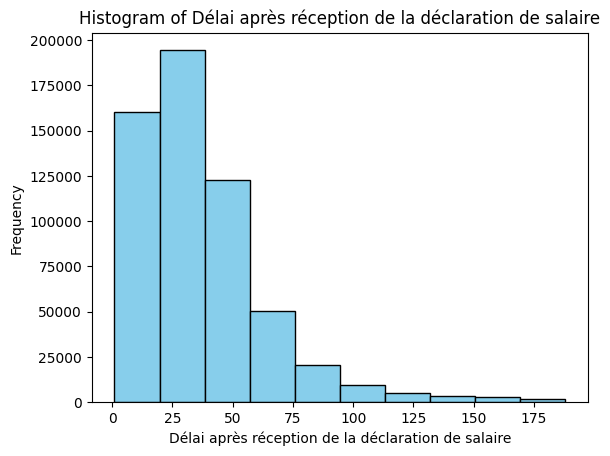

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


# Plotting the histogram
plt.hist(result_df['Délai après réception de la déclaration de salaire'], bins=10, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Délai après réception de la déclaration de salaire')
plt.ylabel('Frequency')
plt.title('Histogram of Délai après réception de la déclaration de salaire')

# Display the plot
plt.show()


In [45]:
#Mettre le nom de la caisse correspondante
df_caisse = df.groupby('Caisse')['Délai après réception de la déclaration de salaire'].mean().reset_index()
df_caisse

,Caisse,Délai après réception de la déclaration de salaire
0,11,44.012523
1,21,37.452560
2,31,35.944954
3,41,38.656598
4,51,34.981824
...,...,...
102,971,50.928449
103,972,54.030358
104,973,57.144832
105,974,48.899742


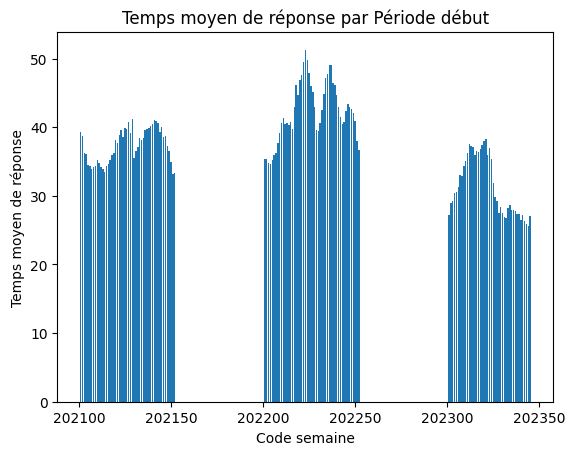

In [52]:
# Convertir la colonne 'Période début' en format datetime si ce n'est pas déjà le cas
result_df['Période début'] = pd.to_datetime(result_df['Période début'])

# Calculer le temps moyen de réponse pour chaque période de début
mean_response_time = result_df.groupby('Code semaine')['Délai après réception de la déclaration de salaire'].mean().reset_index()

# Créer un diagramme de barres pour afficher le temps moyen de réponse par période de début
plt.bar(mean_response_time['Code semaine'], mean_response_time['Délai après réception de la déclaration de salaire'])

# Ajouter des étiquettes et un titre
plt.xlabel('Code semaine')
plt.ylabel('Temps moyen de réponse')
plt.title('Temps moyen de réponse par Période début')

# Afficher le graphique
plt.show()


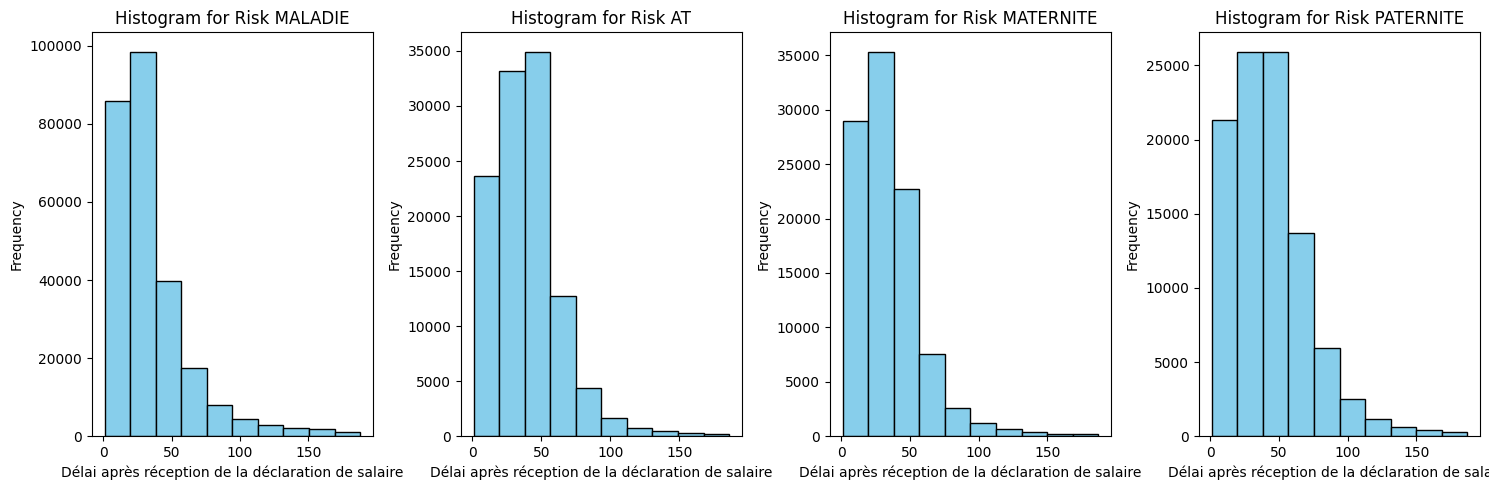

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Créer une figure avec des sous-graphiques pour chaque risque
risks = result_df['Risque'].unique()
num_risks = len(risks)

fig, axes = plt.subplots(nrows=1, ncols=num_risks, figsize=(15, 5))

# Créer un histogramme pour chaque risque
for i, risk in enumerate(risks):
    # Filtrer le DataFrame pour le risque actuel
    filtered_df = result_df[result_df['Risque'] == risk]
    
    # Tracer l'histogramme pour le risque actuel
    axes[i].hist(filtered_df['Délai après réception de la déclaration de salaire'],
                 bins=10, color='skyblue', edgecolor='black')
    
    # Ajouter des étiquettes et un titre pour chaque sous-graphique
    axes[i].set_xlabel('Délai après réception de la déclaration de salaire')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram for Risk {risk}')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()


In [51]:
#Mettre le nom de la caisse correspondante
df_caisse = df.groupby('Injecteur de la déclaration de salaire')['Délai après réception de la déclaration de salaire'].mean().reset_index()
df_caisse

,Injecteur de la déclaration de salaire,Délai après réception de la déclaration de salaire
0,2 - PROGRES PE EDI Machine-Machine,41.941396
1,3 - PROGRES PE DSN,36.776201
2,4 - ARPEGE Automatique,23.972793
3,5 - PROGRES PE EDI Post,43.524131
4,6 - PROGRES PE EFI,44.362429
5,7 - ARPEGE Manip Manuelle,46.523588
6,8 - PROGRES PE PAPIER,57.256893
7,9 - Polyactifs MSA,27.325041
8,Assimilé DSN,14.086134
9,Assimilé papier,36.777062
